In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime

In [28]:
#Load data
df = pd.read_csv("SentimentLabeled_10112022.csv")

In [29]:
df.columns

Index(['date', 'text', 'userid_str', 'status_id_str', 'id', 'name', 'birth',
       'term_partisanship', 'term_type', 'term_state', 'country', 'Bucket',
       'SentimentScore', 'version'],
      dtype='object')

In [30]:
df = df[['date', 'text', 'id', 'name', 'birth',
       'term_partisanship', 'term_type', 'term_state']]

In [31]:
df.shape

(15846, 8)

In [24]:
df = df.drop_duplicates(subset=['id']).reset_index(drop=True)

In [26]:
df.columns

Index(['date', 'text', 'id', 'name', 'birth', 'term_partisanship', 'term_type',
       'term_state'],
      dtype='object')

In [18]:
df['id'].nunique()

14544

In [16]:
df.date.sort_values()

3319     2009-05-08
2475     2009-05-18
1286     2009-06-03
3076     2009-06-09
3104     2009-06-16
            ...    
14154    2021-08-11
14153    2021-08-11
14126    2021-08-11
14147    2021-08-11
14185    2021-08-12
Name: date, Length: 14544, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14544 entries, 0 to 14543
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               14544 non-null  object
 1   text               14544 non-null  object
 2   id                 14544 non-null  int64 
 3   name               14544 non-null  object
 4   birth              14416 non-null  object
 5   term_partisanship  14416 non-null  object
 6   term_type          14544 non-null  object
 7   term_state         14544 non-null  object
dtypes: int64(1), object(7)
memory usage: 909.1+ KB


In [8]:
#Column Missing values
df.isnull().sum(axis = 0)

date                   0
text                   0
id                     0
name                   0
birth                128
term_partisanship    128
term_type              0
term_state             0
dtype: int64

In [9]:
#Row Missing values
df.isnull().sum(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
14539    2
14540    2
14541    2
14542    2
14543    2
Length: 14544, dtype: int64

In [10]:
#Number of Tweets
df.shape[0]

14544

In [11]:
#Number of Unique Author
df.name.nunique()

568

In [12]:
#Number of posts per Author in descending order 
df.name.value_counts()

Marsha Blackburn               451
Marco Rubio                    433
Jim Banks                      416
Ted Cruz                       408
Tom Cotton                     322
                              ... 
Jahana Hayes                     1
F. James Sensenbrenner, Jr.      1
Victoria Spartz                  1
Lori Trahan                      1
Xochitl Torres Small             1
Name: name, Length: 568, dtype: int64

In [79]:
def replace_bracket(x):
    if pd.isnull(x) == False:
        return x.replace('{', '').replace('}', '')
    else:
        return np.nan

In [80]:
df.term_partisanship = df.term_partisanship.apply(replace_bracket)
df.term_type = df.term_type.apply(replace_bracket)
df.term_state = df.term_state.apply(replace_bracket)

In [81]:
df.term_partisanship.value_counts()

Republican     10420
Democrat        3889
Independent      107
Name: term_partisanship, dtype: int64

In [82]:
df.term_type.value_counts()

rep    9017
sen    5527
Name: term_type, dtype: int64

In [1]:
# plt.rcParams["figure.figsize"] = (3,3)
# df.term_type.hist(bins=2, rwidth=0.8)
# plt.ylabel("Number of Posts")
# plt.xlabel("Term Type")
# plt.show()

In [35]:
df.term_state.value_counts()

TX      1387
FL      1157
TN       995
CA       888
OH       760
        ... 
{NE}       1
{NH}       1
{WV}       1
{ID}       1
{MN}       1
Name: term_state, Length: 99, dtype: int64

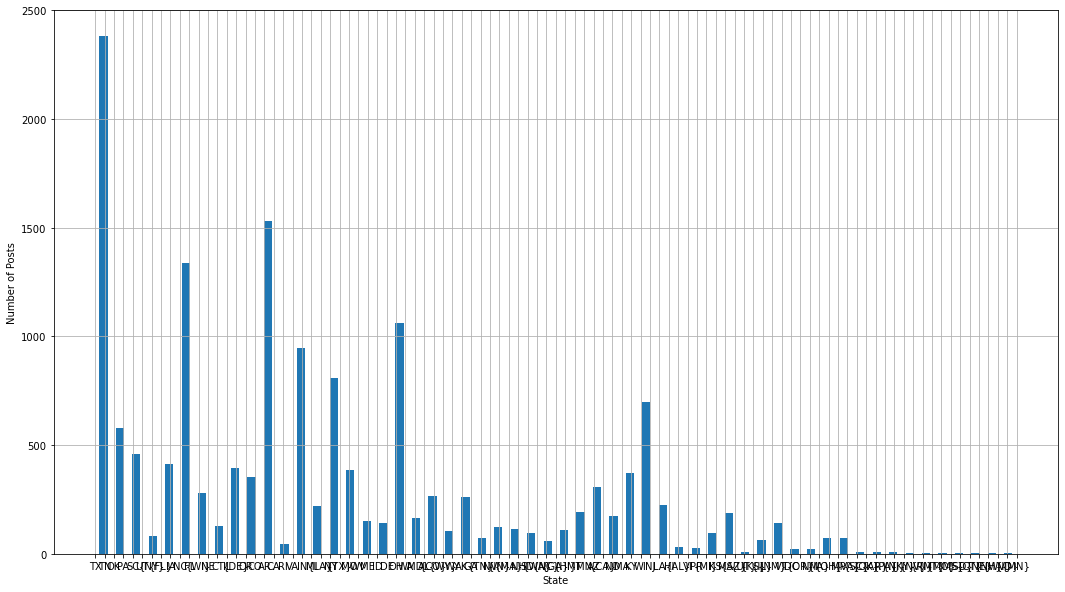

In [34]:
plt.rcParams["figure.figsize"] = (18,10)
df.term_state.hist(bins=56, rwidth=0.5)
plt.ylabel("Number of Posts")
plt.xlabel("State")
plt.show()

In [85]:
def age(birthdate):
    if pd.isnull(birthdate):
        return np.nan
    else:
        birthdate = datetime.strptime(birthdate, '%Y-%m-%d')
        today = date.today()
        age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
        return int(age)

In [86]:
df['age'] = df.birth.apply(age)

<AxesSubplot:>

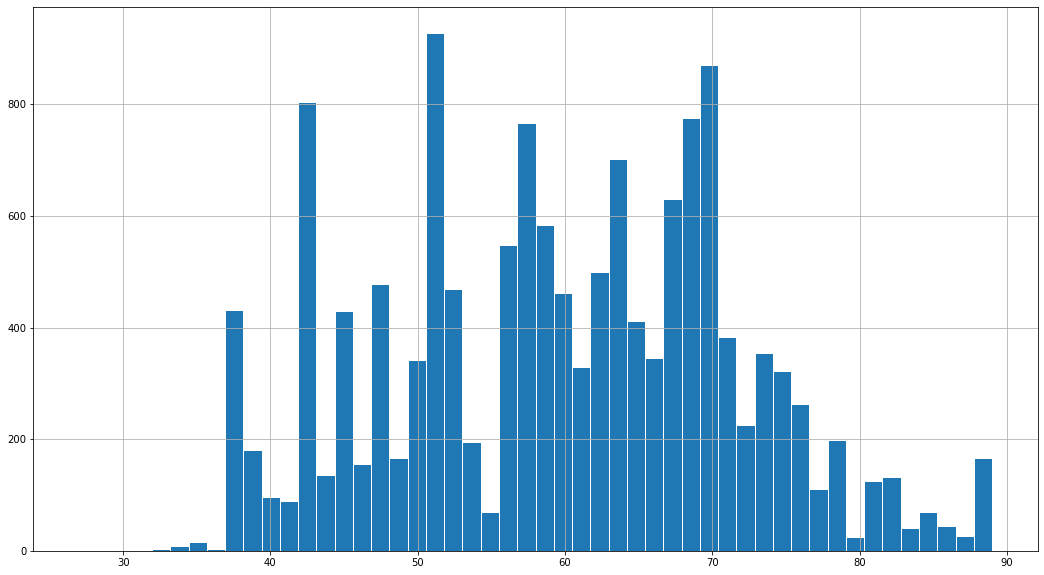

In [87]:
df['age'].hist(bins=50, ec='w')

In [88]:
datetime_object = datetime.strptime(df.date[0], '%Y-%m-%d')

In [89]:
#not include bucket or sentiment

In [90]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [91]:
word_string=" ".join(df.text.str.lower())

In [92]:
df.text = df.text.str.lower()

In [93]:
filter_word = ['https']
for i in filter_word:
    df.text = df.text.str.replace(i, '')

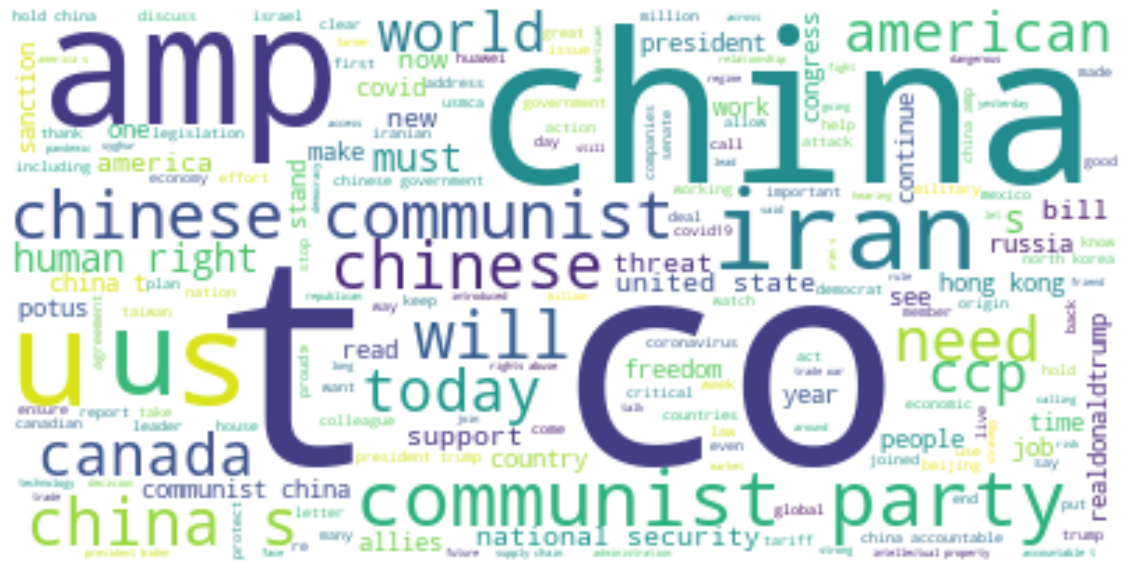

In [94]:
#Wordcloud
text = " ".join(i for i in df.text.str.lower())
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()